Задание
 - С помощью OpenCV и веб-камеры получить изображение документа на листе A4
 - Перевести изображение в серошкальный формат
 - Определить координаты угловых точек документа с помощью интерактивный утилиты matplotlib (см. семинар 1)
 - Выполнить преобразование перспективы так, чтобы плоскость документа была выровнена (эффект сканирования)
 - Провести адаптивную эквализацию гистограммы
 - Выделить на изображении все границы
 - Получить маску по границам
 - Применить маску к изображению, полученному на этапе 5.

In [ ]:
import skimage as io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image

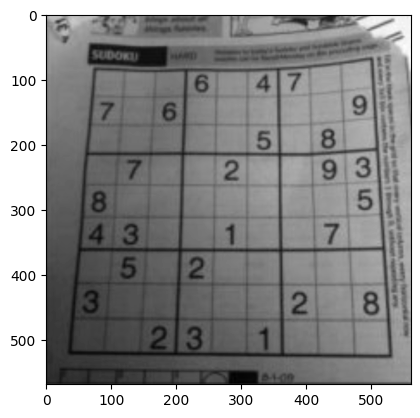

In [ ]:
img = cv.imread('cross.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

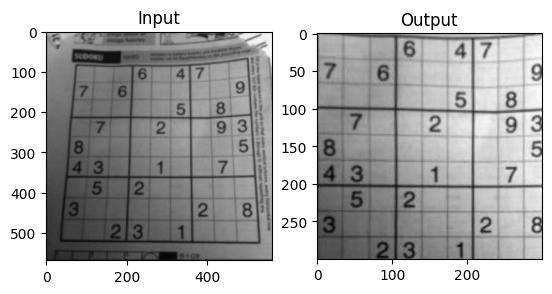

In [ ]:
img2 = cv.resize(img, dsize=(854, 854))

# pts1 = np.float32([[70,85],[519,73],[42,540],[548,545]])
pts1 = np.float32([[115,130],[746,106],[60,775],[788,784]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img2,M,(300,300))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray'),
ax[0].set_title('Input')
ax[1].imshow(dst, cmap='gray')
ax[1].set_title('Output')
fig.show()

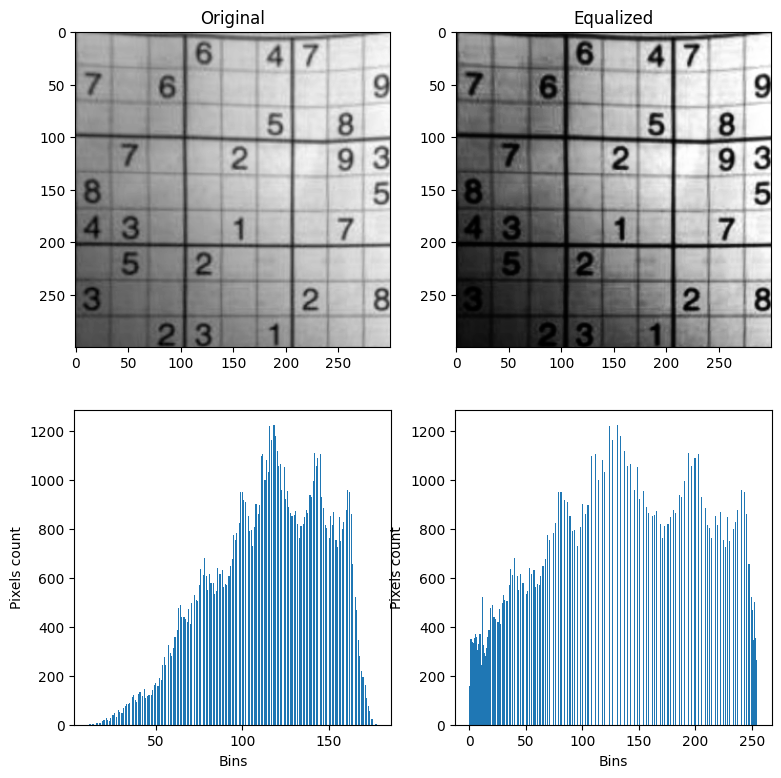

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
img_eq = cv.equalizeHist(dst)
ax[0, 0].imshow(dst, cmap='gray')
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img_eq, cmap='gray')
ax[0, 1].set_title('Equalized')
ax[1, 0].hist(dst.flatten(), bins=256)
ax[1, 0].set_xlabel('Bins')
ax[1, 0].set_ylabel('Pixels count')
ax[1, 1].hist(img_eq.flatten(), bins=256)
ax[1, 1].set_xlabel('Bins')
ax[1, 1].set_ylabel('Pixels count')
fig.show()

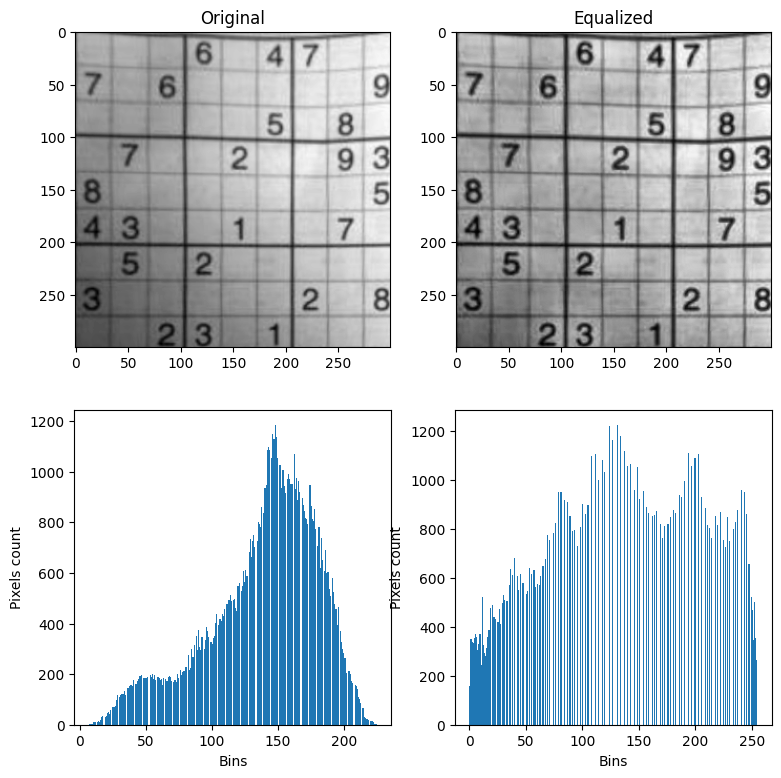

In [ ]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(dst)
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
ax[0, 0].imshow(dst, cmap='gray')
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img_clahe, cmap='gray')
ax[0, 1].set_title('Equalized')
ax[1, 0].hist(img_clahe.flatten(), bins=256)
ax[1, 0].set_xlabel('Bins')
ax[1, 0].set_ylabel('Pixels count')
ax[1, 1].hist(img_eq.flatten(), bins=256)
ax[1, 1].set_xlabel('Bins')
ax[1, 1].set_ylabel('Pixels count')
fig.show()

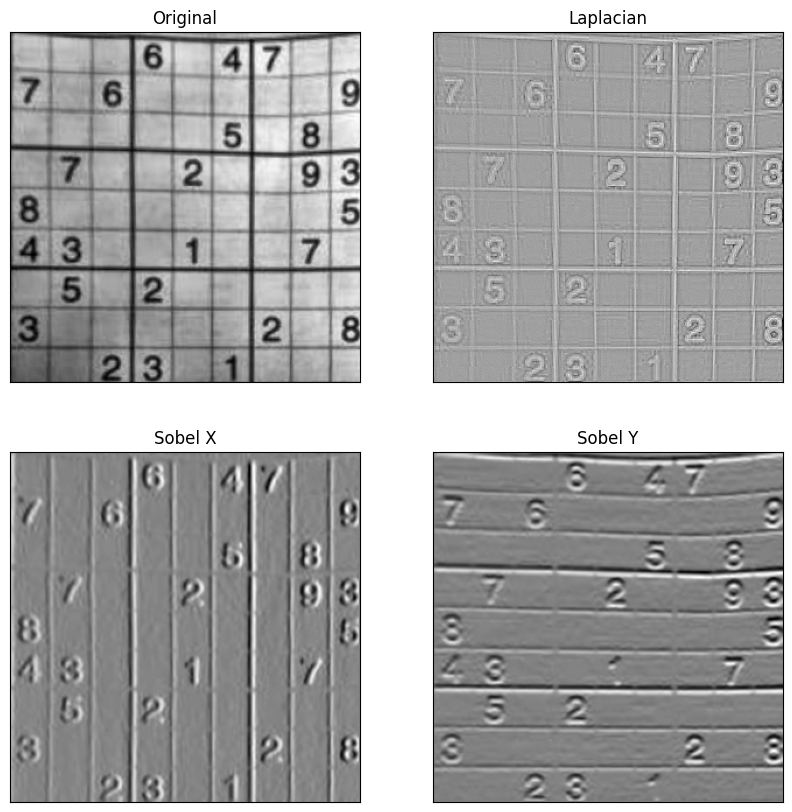

In [ ]:

laplacian = cv.Laplacian(img_clahe, cv.CV_64F)
sobelx = cv.Sobel(img_clahe, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img_clahe, cv.CV_64F, 0, 1, ksize=5)

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1), plt.imshow(img_clahe, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

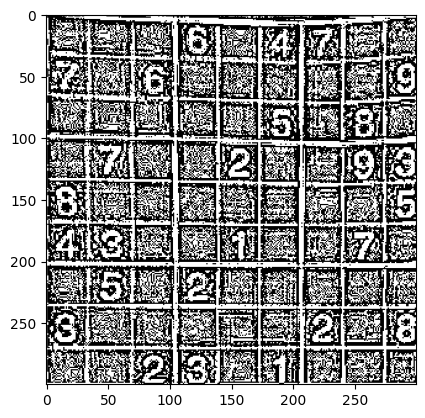

In [ ]:
lap = laplacian.astype('uint8')
res, thresh = cv.threshold(lap, 120, 255, cv.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

In [ ]:
thresh.shape

(300, 300)

Получилось не очень из-за неоднородной освещенности,

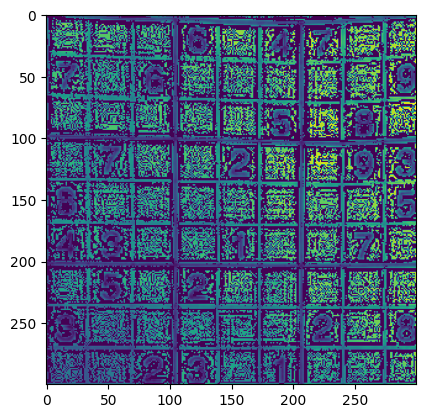

In [ ]:
res = cv.bitwise_and(img_clahe, thresh)
plt.imshow(res)
plt.show()

array([[ 42,  60,  73, ...,  62,  66,  69],
       [ 49,   0,   0, ...,  82,  86,  90],
       [ 54,   0,   0, ..., 117, 119, 121],
       ...,
       [ 34,   0,   0, ..., 165,   0,   0],
       [ 32,   0,   0, ...,   0,   0,   0],
       [ 29,  49,  63, ..., 141, 149, 157]], dtype=uint8)
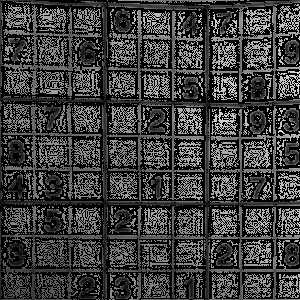

In [ ]:
res